In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
stat = np.fromfile("sample.txt", dtype=int, sep=' ')
stat

array([20, 26, 32, 34, 26, 28, 22, 30, 17, 24, 30, 28, 18, 22, 24, 26, 34,
       28, 22, 20, 34, 24, 28, 20, 32, 17, 22, 24, 26, 30, 30, 22, 26, 35,
       28, 24, 30, 32, 28, 18, 20, 30, 17, 24, 32, 28, 22, 26, 24, 30, 34,
       26, 24, 28, 22, 30, 35, 32, 20, 17, 28, 22, 36, 30, 20, 26, 28, 23,
       24, 32, 20, 26, 30, 24, 32, 17, 22, 28, 35, 26, 28, 35, 32, 22, 26,
       24, 26, 24, 30, 24, 18, 24, 26, 28, 35, 30, 26, 22, 26, 28])

c:\program files (x86)\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


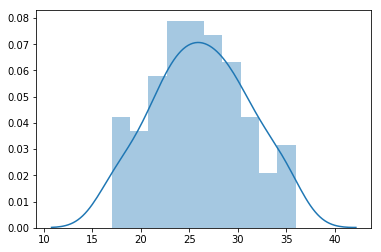

In [3]:
sns.distplot(stat, hist=True, kde=True, bins=10)
plt.show()

c:\program files (x86)\python37-32\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


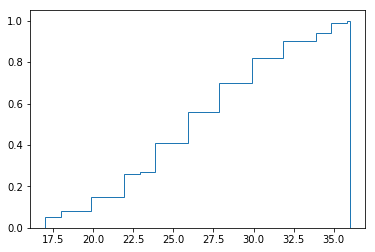

In [4]:
plt.hist(stat, 100, normed=1, histtype='step', cumulative=True)
plt.show()

In [5]:
"Минимум: {}, максимум: {}".format(stat.min(), stat.max())

'Минимум: 17, максимум: 36'

In [6]:
"Среднее:", np.mean(stat)

('Среднее:', 26.25)

In [7]:
"Дисперсия:", np.var(stat)

('Дисперсия:', 23.8075)

In [8]:
def stdev(arr):
    """Стандартное отклонение"""
    mean = np.mean(arr)
    return np.sqrt(sum([(x - mean)**2 for x in arr]) / (len(arr)-1))

"Стандартное отклонение:", stdev(stat)

('Стандартное отклонение:', 4.903873958206899)

In [9]:
def sem(arr):
    """Стандартная ошибка"""
    return stdev(arr) / np.sqrt(len(arr))

"Стандртная ошибка:", sem(stat)

('Стандртная ошибка:', 0.49038739582068985)

In [10]:
"Мода:", st.mode(stat)

('Мода:', ModeResult(mode=array([26]), count=array([15])))

In [11]:
"Медиана:", np.median(stat)

('Медиана:', 26.0)

In [12]:
def quartil(arr):
    """квартили"""
    q1, q2, q3 = 0, 0, 0
    arr = sorted(arr)
    q2 = np.median(arr)
    mid = int(np.floor(len(arr)/2))
    if len(arr) % 2 == 0:
        q1 = np.median(arr[:mid + 1])
        q3 = np.median(arr[mid:])
    else:
        q1 = np.median(arr[:mid])
        q3 = np.median(arr[mid + 1:])

    return q1, q2, q3

"Квартили:", quartil(stat)

('Квартили:', (22.0, 26.0, 30.0))

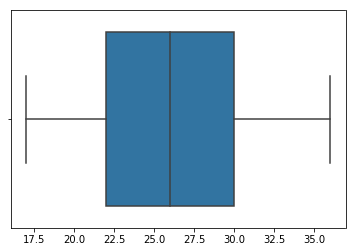

In [13]:
# ящик с усами
sns.boxplot(stat)
plt.show()

In [14]:
def kurtosis(arr):
    """эксцесс"""
    return sum((arr - np.mean(arr))**4) / len(arr) / stdev(stat)**4 - 3

"Эксцесс:", kurtosis(stat)

('Эксцесс:', -0.7647110290930956)

In [15]:
def assimetria(arr):
    return sum((arr - np.mean(arr))**3) / len(arr) / stdev(stat)**3

"Асимметрия:", assimetria(stat)

('Асимметрия:', -0.0018761406000148688)

In [17]:
def confidence_interval(arr, y):
    """Доверительные интервалы при надежности y"""
    # для математического ожидания
    t = 1.96  
    e = t * sem(arr)
    mean_interval = (np.mean(arr) - e, np.mean(arr) + e)

    # для среднего квадратичного отклонения
    # Для количества степеней свободы k = 99 и p = (1-0.95)/2 = 0.025
    X2 = st.chi2.isf(q=(1-y)/2, df=len(arr) - 1)  
    tH = (len(arr) - 1) * np.var(arr, ddof=1) / X2
    
    # Для количества степеней свободы k = 99 и p = (1+0.95)/2 = 0.975
    X2 = st.chi2.isf(q=(1+y)/2, df=len(arr) - 1)  
    tB = (len(arr) - 1) * np.var(arr, ddof=1) / X2
    std_interval = (np.sqrt(tH), np.sqrt(tB))

    return mean_interval, std_interval

intervals = confidence_interval(stat, 0.95)
"Доверительные интервалы для мат. ожидания: {} и среднего квадратичного отклонения: {}:".format(intervals[0], intervals[1])

'Доверительные интервалы для мат. ожидания: (25.288840704191447, 27.211159295808553) и среднего квадратичного отклонения: (4.305634904303432, 5.696709032332643):'

In [24]:
def laplass(x):
    return st.norm.cdf(x) - 0.5

def pirson(arr, a, k):
    """
    Вычисляет хи-квадрат для заданной выборке
    :param arr: массив чисел - выборка
    :param a: уровень значимости
    :param k: количество интервалов разбиения
    :return: True, если совокупность подчиняется нормальному закону, иначе False.
    Также возвращает вычисленное значение хи-квадрат.
    """

    _min = np.min(arr)
    _max = np.max(arr)
    h = (_max - _min) / k

    x = _min
    k_intervals = {}
    while x < _max:
        xi = np.round(x + h, 3)
        k_intervals[(x, xi)] = {'ni': 0}
        x = xi

    for x in arr:
        for interval in k_intervals:
            if interval[0] <= x <= interval[1]:
                k_intervals[interval]['ni'] += 1
                break

    mean = np.mean(arr)
    std = stdev(arr)
    chisquare = 0
    chi_crit = st.chi2.isf(q=a, df=k - 2 - 1)

    for interval in k_intervals:
        x1 = (interval[0] - mean) / std
        x2 = (interval[1] - mean) / std
        k_intervals[interval]["pi"] = laplass(x2) - laplass(x1)
        chisquare += ((k_intervals[interval]['ni'] - len(arr) * k_intervals[interval]["pi"]) ** 2) / \
                     (len(arr) * k_intervals[interval]["pi"])

    if chisquare > chi_crit:
        return False, chisquare, chi_crit
    else:
        return True, chisquare, chi_crit
    
"Пирсон: теория подтверждена {0}, chi2 = {1}, chi2_crit = {2}".format(*pirson(stat, a=0.025, k=7))

'Пирсон: теория подтверждена False, chi2 = 13.196997543448576, chi2_crit = 11.143286781877796'